# Exploratory Data Analysis

In [73]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from matplotlib.lines import Line2D
from pylab import rcParams
rcParams['figure.figsize'] = 15,15

In [74]:
train = pd.read_csv("train.csv", index_col="id")
test = pd.read_csv("test.csv", index_col="id")

In [75]:
train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,A,B,A,C,B,B,A,E,E,L,...,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630,8.343538
499996,A,B,A,C,B,B,A,E,E,L,...,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902,7.851861
499997,A,B,A,C,B,B,A,E,C,M,...,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041,7.600558


In [76]:
# Check for duplicates:

duplicates = train.duplicated()
duplicates.sum()

0

## Numerical columns:

In [77]:
numerical_columns = train[["cont0", "cont1", "cont2", "cont3", "cont4", "cont5", "cont6", "cont7", "cont8", "cont9", "cont10", "cont11", "cont12"]]
numerical_columns

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12
id,,,,,,,,,,,,,
1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618
2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679
3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133
4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799
6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227
499996,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933
499997,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286


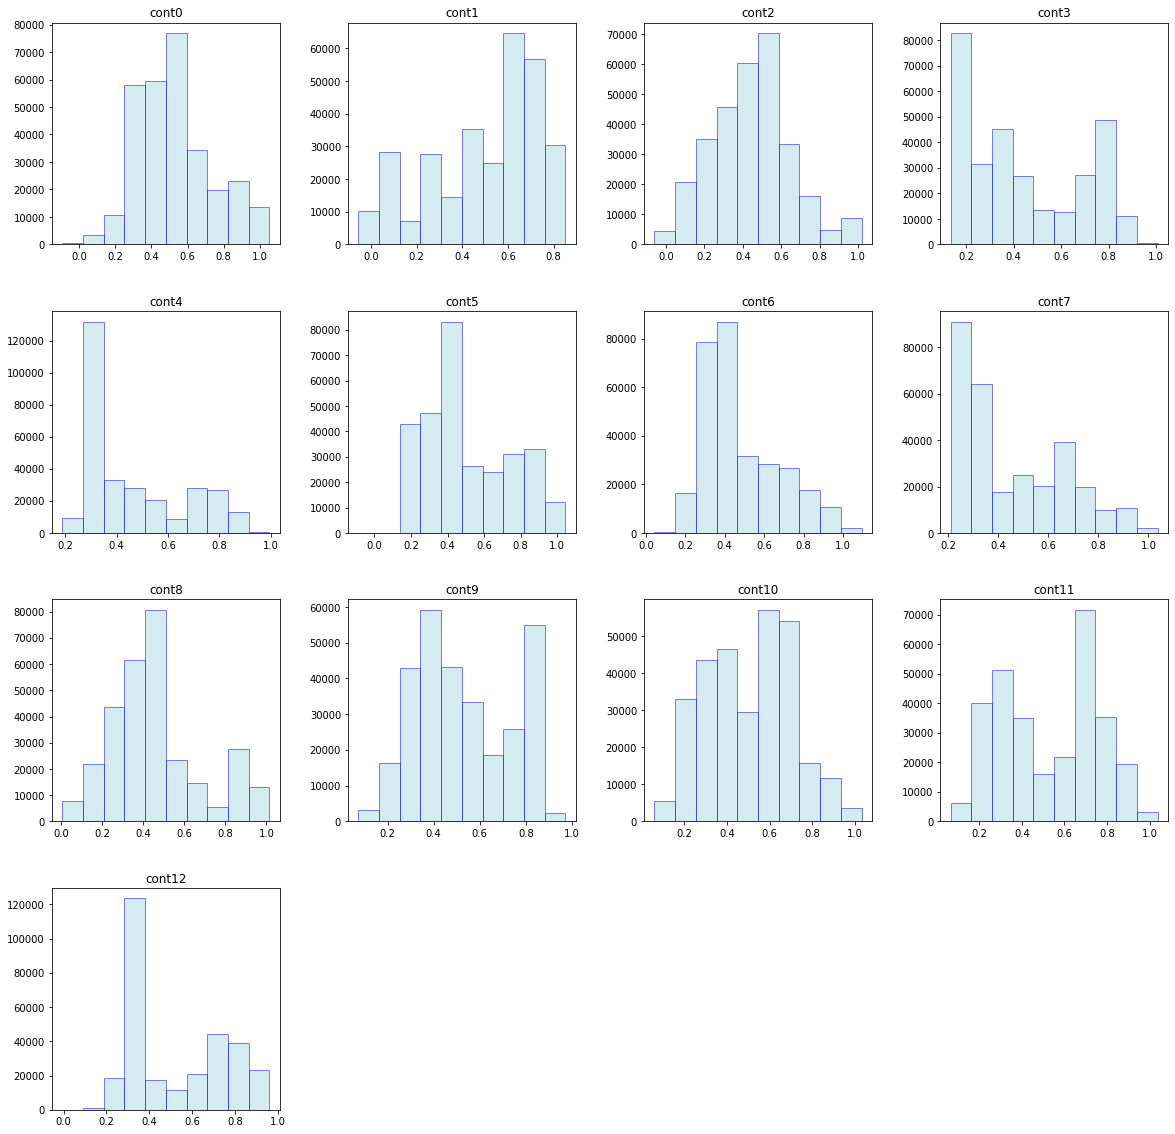

In [78]:
numerical_columns.hist(figsize=((20,20)), alpha=0.5, animated=True, edgecolor='blue', color='lightblue', grid=False);

In [79]:
numerical_columns.describe()

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549
std,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892
min,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600
25%,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143
50%,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365
75%,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431
max,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370


#### Check for outliers:

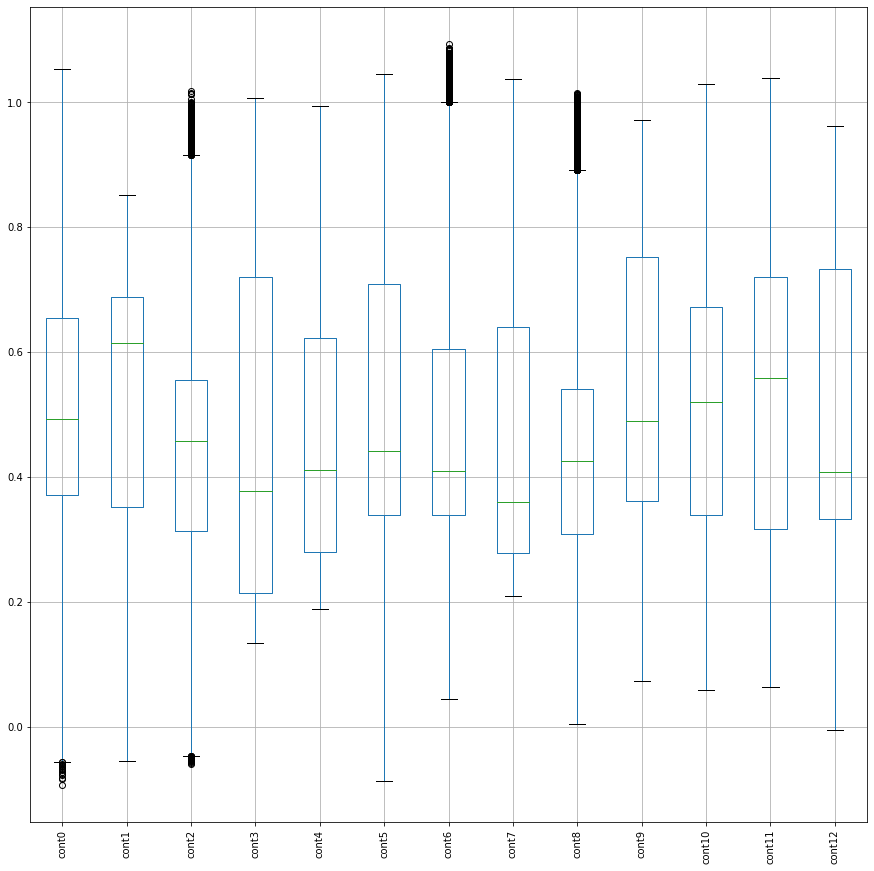

In [80]:
numerical_columns.boxplot(showcaps=True, showfliers=True)
plt.xticks(rotation=90);

##### "cont0" has outliers:

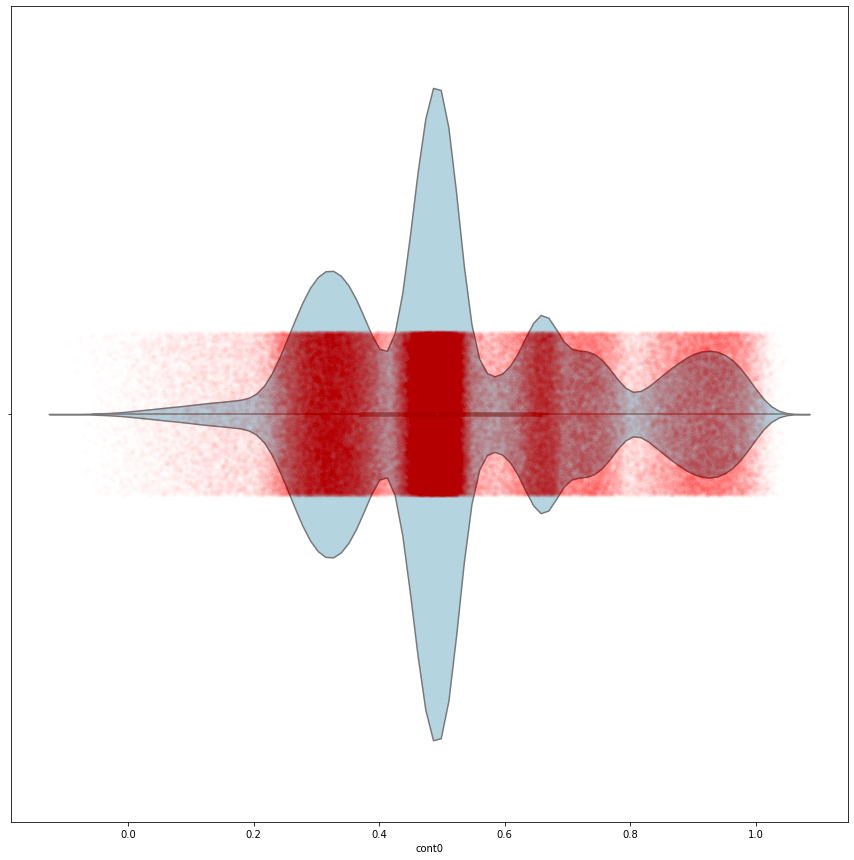

In [81]:
sns.violinplot(numerical_columns["cont0"], color='lightblue', showcaps=True, showfliers=True)
sns.stripplot(numerical_columns["cont0"], color='red', alpha=0.01);

In [82]:
# Find z-scores and put a threshold of 3 to determine which outliers
# are too much and need to be cut:
z=np.abs(stats.zscore(numerical_columns["cont0"]))
print(z)

print(np.where(z > 3))

[1.94537248 0.42468212 1.01318131 ... 0.88726693 0.36495082 0.24006268]
(array([132579]),)


In [83]:
numerical_columns["cont0"].iloc[[132579]]

id
220933   -0.093505
Name: cont0, dtype: float64

In [84]:
numerical_columns["cont0"].sort_values(ascending=True)

id
220933   -0.093505
404929   -0.084291
219573   -0.081515
13684    -0.077237
425346   -0.075905
            ...   
202087    1.043916
1681      1.044469
324584    1.044700
447011    1.047963
69374     1.052666
Name: cont0, Length: 300000, dtype: float64

In [85]:
#remove this outlier:
numerical_columns = numerical_columns.loc[numerical_columns["cont0"] >= -0.093]

In [86]:
# check it is removed:
numerical_columns["cont0"].sort_values(ascending=True)

id
404929   -0.084291
219573   -0.081515
13684    -0.077237
425346   -0.075905
214261   -0.072506
            ...   
202087    1.043916
1681      1.044469
324584    1.044700
447011    1.047963
69374     1.052666
Name: cont0, Length: 299999, dtype: float64

##### "cont2" outliers:

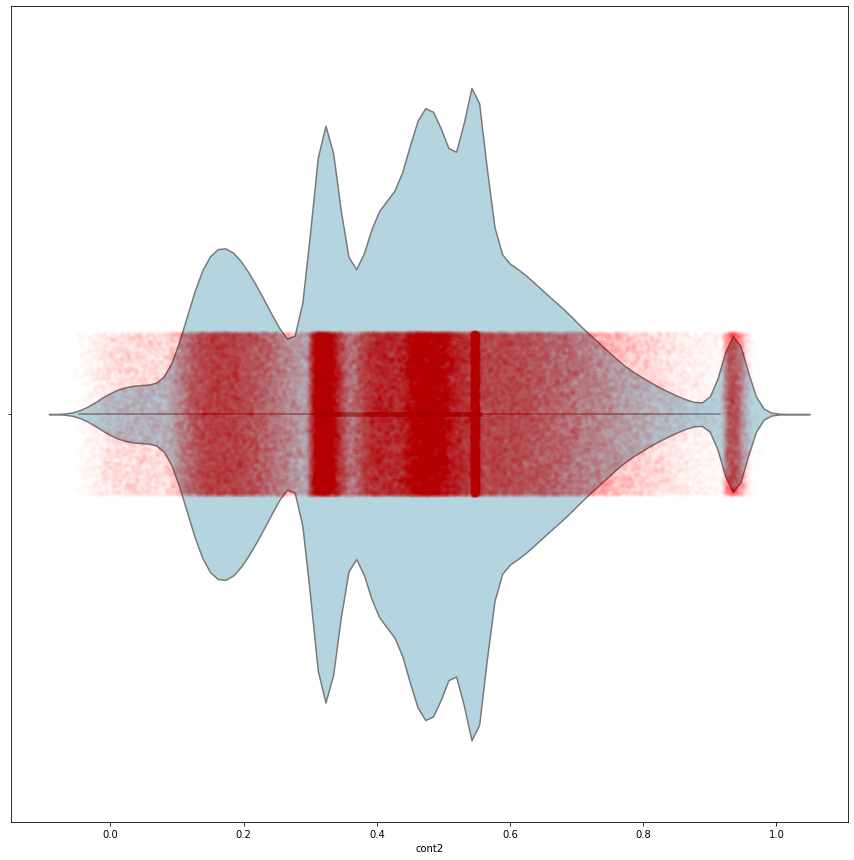

In [87]:
sns.violinplot(numerical_columns["cont2"], color='lightblue', showcaps=True, showfliers=True)
sns.stripplot(numerical_columns["cont2"], color='red', alpha=0.01);

In [88]:
# Find z-scores and put a threshold of 3 to determine which outliers
# are too much and need to be cut:
z=np.abs(stats.zscore(numerical_columns["cont2"]))
print(z)

print(np.where(z > 3))

[1.59759793 0.43319126 0.05262352 ... 0.09433865 1.08324665 1.54760186]
(array([], dtype=int64),)


The outliers we see on the boxplot for "cont2" are not too bad according to the zscore, so we leave them in

##### "cont6" outliers:

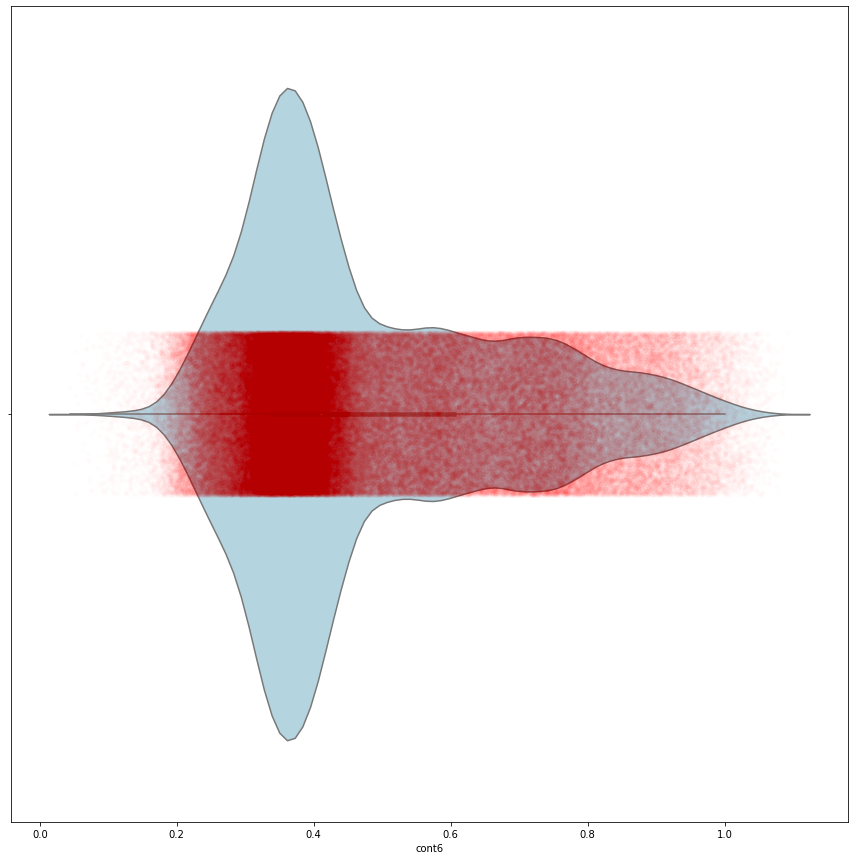

In [89]:
sns.violinplot(numerical_columns["cont6"], color='lightblue', showcaps=True, showfliers=True)
sns.stripplot(numerical_columns["cont6"], color='red', alpha=0.01);

In [90]:
# Find z-scores and put a threshold of 3 to determine which outliers
# are too much and need to be cut:
z=np.abs(stats.zscore(numerical_columns["cont6"]))
print(z)
print(np.where(z > 3))

[0.29462622 0.68656085 0.5651051  ... 0.47899462 0.80139199 0.38559695]
(array([  6125,   7728,   8505,  16410,  16880,  18781,  19320,  21905,
        25039,  35467,  44422,  44672,  51241,  52092,  54045,  55529,
        55914,  59087,  61317,  61685,  64366,  65652,  70458,  71572,
        74500,  76561,  78920,  80508,  84918,  88136,  88672,  92607,
        94038,  95339,  96018,  97433, 105634, 105668, 108028, 118206,
       124990, 125178, 125748, 126994, 127057, 128958, 129818, 131344,
       132985, 134681, 135550, 137701, 138189, 138275, 138452, 140136,
       141804, 141917, 153455, 157157, 162105, 163001, 166433, 171160,
       176000, 178727, 179023, 190373, 190804, 194994, 199365, 200468,
       202823, 204651, 209079, 209900, 213498, 214783, 214845, 217840,
       222078, 227161, 230078, 231553, 234209, 241165, 241990, 243316,
       245600, 246726, 250876, 251245, 253861, 255532, 256128, 258303,
       258779, 263563, 269401, 272345, 272511, 274033, 278827, 279558,
    

In [91]:
# find where z is greater than three:
x = z.tolist()
x = sorted(x, reverse=True)
print(x[110:130])
print("Index of first value with z-score > 3: ", np.where(z == 3.0010249691534847))
print("Index of last value with z-score < 3: ", np.where(z == 2.999924948184652))

[3.0036781103049703, 3.0026038582625816, 3.00249824270369, 3.001913653177322, 3.0010249691534847, 2.999924948184652, 2.998917790595505, 2.9976529437419295, 2.9975875425240988, 2.997415361648031, 2.9966922442994295, 2.9957866279214618, 2.9954032688412173, 2.9952979707639655, 2.994550566069908, 2.9938205170388357, 2.99353298450025, 2.992666735845636, 2.9923334330372913, 2.9922661269296222]
Index of first value with z-score > 3:  (array([16410]),)
Index of last value with z-score < 3:  (array([254380]),)


In [92]:
print(numerical_columns["cont6"].iloc[[16410]])
print(numerical_columns["cont6"].iloc[[254380]])

id
27416    1.055839
Name: cont6, dtype: float64
id
424257    1.055627
Name: cont6, dtype: float64


In [93]:
# remove the outliers with value greater than 1.055627:
numerical_columns = numerical_columns.loc[numerical_columns["cont6"] <= 1.055627]

In [94]:
# check they are removed:
numerical_columns["cont6"].sort_values(ascending=False).head(10)

id
288401    1.055433
464768    1.055190
23114     1.055177
196426    1.055144
470092    1.055005
322743    1.054831
189020    1.054757
71034     1.054737
386766    1.054593
485845    1.054453
Name: cont6, dtype: float64

##### "cont8" outliers:

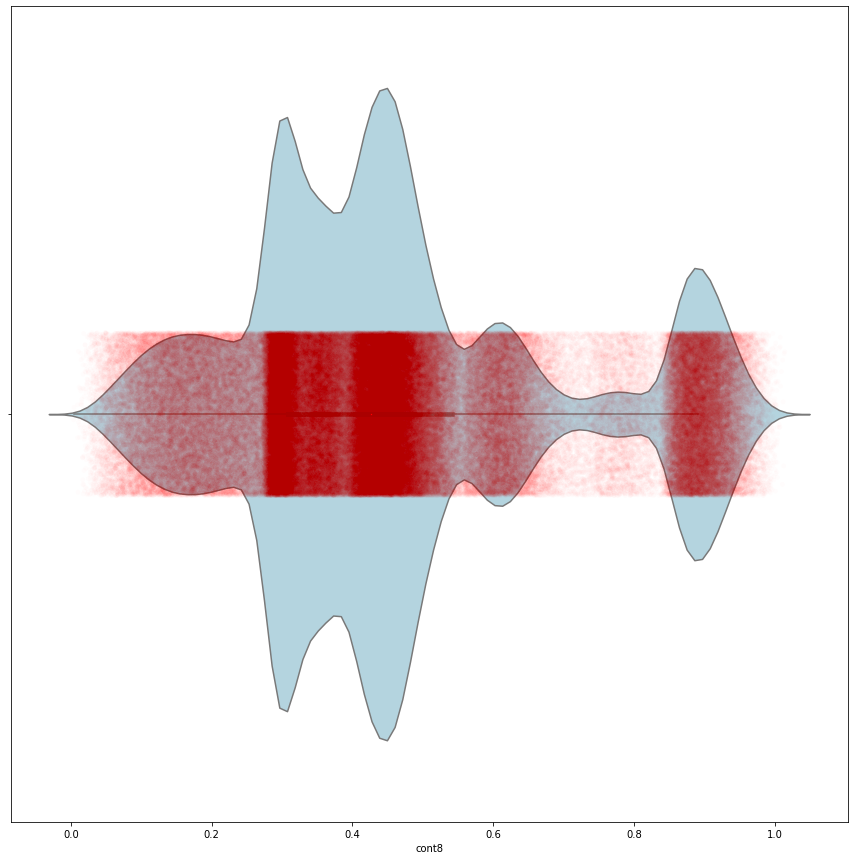

In [95]:
sns.violinplot(numerical_columns["cont8"], color='lightblue', showcaps=True, showfliers=True)
sns.stripplot(numerical_columns["cont8"], color='red', alpha=0.01);

In [96]:
# Find z-scores and put a threshold of 3 to determine which outliers
# are too much and need to be cut:
z=np.abs(stats.zscore(numerical_columns["cont8"]))
print(z)
print(np.where(z > 3))

[1.97824479 0.60780041 1.84146699 ... 1.46548034 1.08051956 0.17525778]
(array([], dtype=int64),)


The outliers we see on the boxplot for "cont8" are not too bad according to the zscore, so we leave them in

#### Correlation matrix:

In [97]:
numerical_columns["target"] = train["target"]

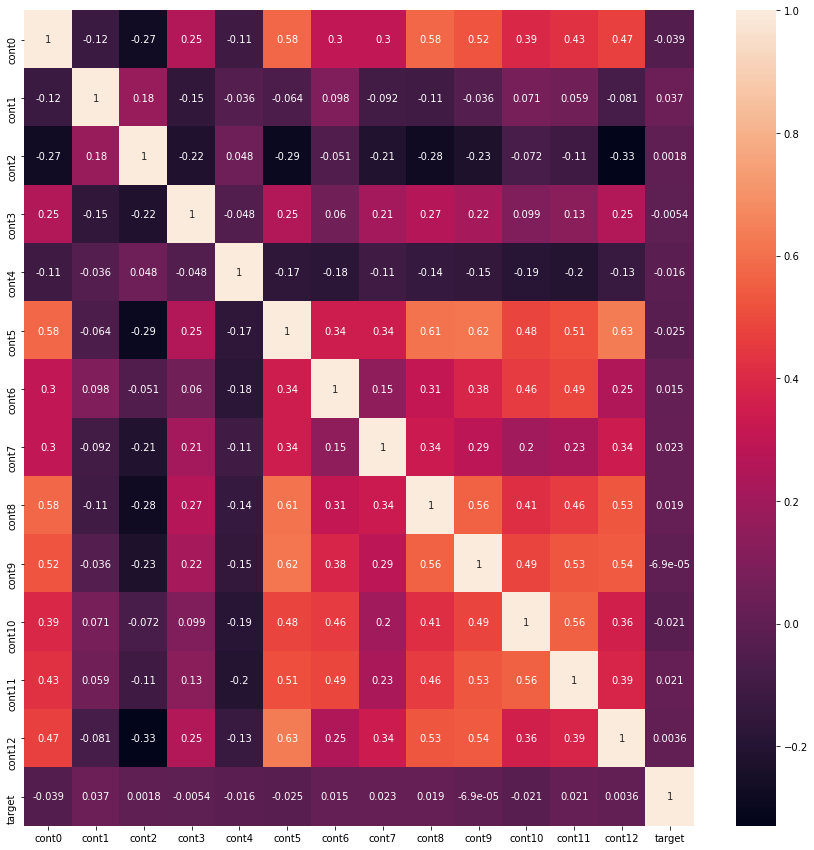

In [98]:
corr = numerical_columns.corr()
sns.heatmap(corr, annot=True);

In [99]:
print("Numerical columns most correlated with target column:\n", abs(corr["target"]).sort_values(ascending=False))

Numerical columns most correlated with target column:
 target    1.000000
cont0     0.039252
cont1     0.036736
cont5     0.025328
cont7     0.023437
cont10    0.021152
cont11    0.020626
cont8     0.019249
cont4     0.015869
cont6     0.014825
cont3     0.005378
cont12    0.003573
cont2     0.001827
cont9     0.000069
Name: target, dtype: float64


In [100]:
numerical_columns

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,target
id,,,,,,,,,,,,,,
1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,6.994023
2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,8.071256
3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,5.760456
4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,7.806457
6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,8.343538
499996,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,7.851861
499997,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,7.600558


## Categorical columns:

In [101]:
categorical_columns = train[["cat0", "cat1", "cat2", "cat3", "cat4", "cat5", "cat6", "cat7", "cat8", "cat9"]]
categorical_columns

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
id,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I
2,B,A,A,A,B,B,A,E,A,F
3,A,A,A,C,B,D,A,B,C,N
4,A,A,A,C,B,D,A,E,G,K
6,A,B,A,A,B,B,A,E,C,F
...,...,...,...,...,...,...,...,...,...,...
499993,A,B,A,C,B,B,A,E,E,L
499996,A,B,A,C,B,B,A,E,E,L
499997,A,B,A,C,B,B,A,E,C,M


In [102]:
categorical_columns.describe(include='all')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000
unique,2,2,2,4,4,4,8,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,281471,162678,276551,183752,297373,149208,292643,267631,121054,107281


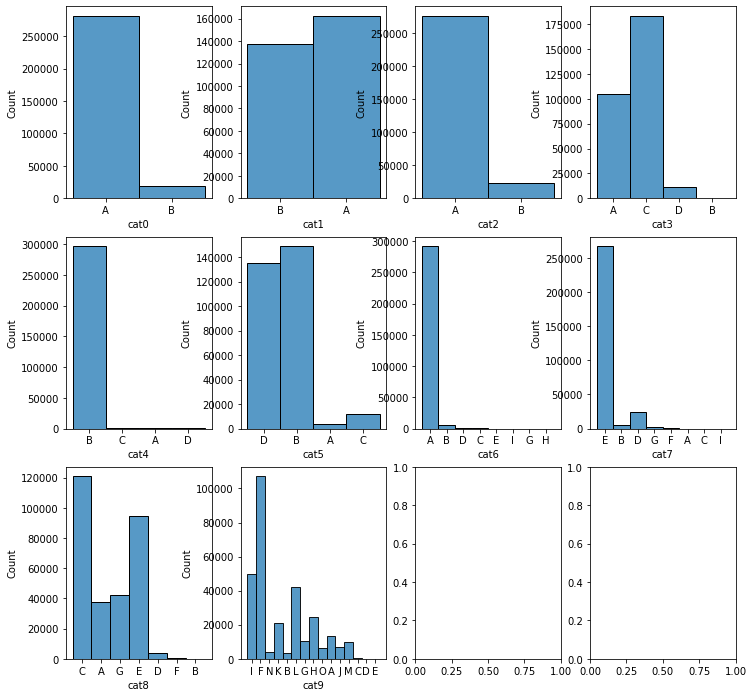

In [103]:
num_rows, num_cols = 3,4
f, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))
for index, column in enumerate(categorical_columns.columns):
    i,j = (index // num_cols, index % num_cols)
    sns.histplot(x=column, data=categorical_columns, ax=axes[i,j]);

## Target:

In [104]:
target = train["target"]

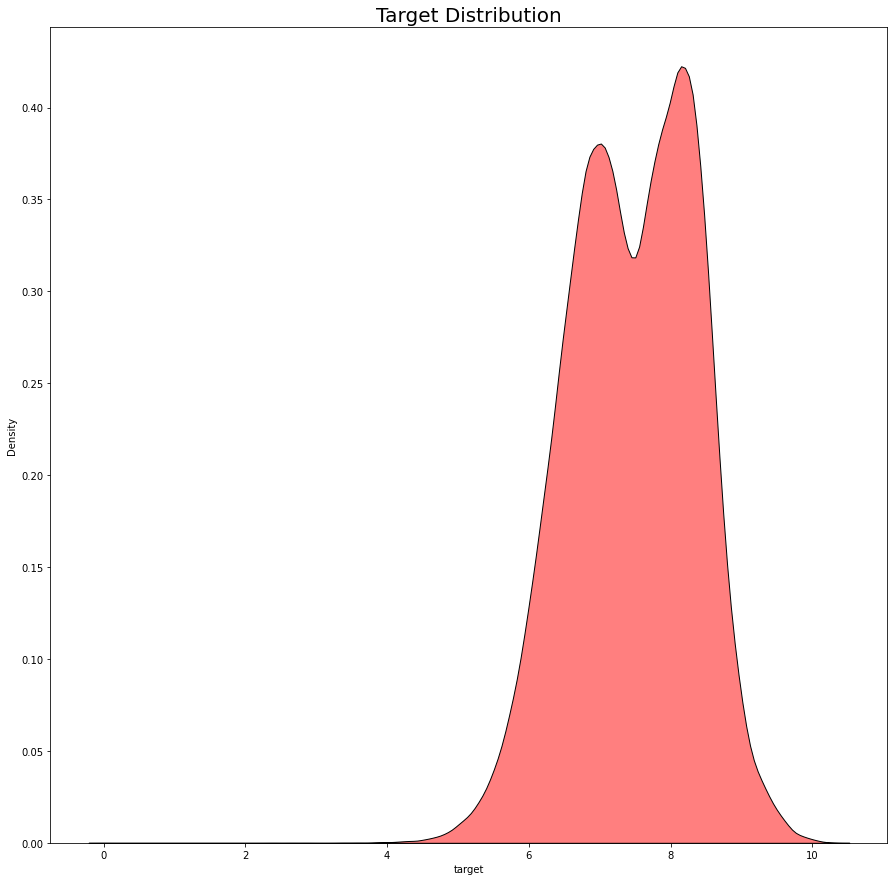

In [105]:
ax = sns.kdeplot(target, shade=True, color='red', edgecolor='black', alpha=0.5, zorder=3)
plt.title('Target Distribution', fontsize=20);

In [106]:
target.describe()

count    300000.000000
mean          7.456260
std           0.887295
min           0.000000
25%           6.798341
50%           7.496503
75%           8.161166
max          10.309208
Name: target, dtype: float64

#### Check for outliers:

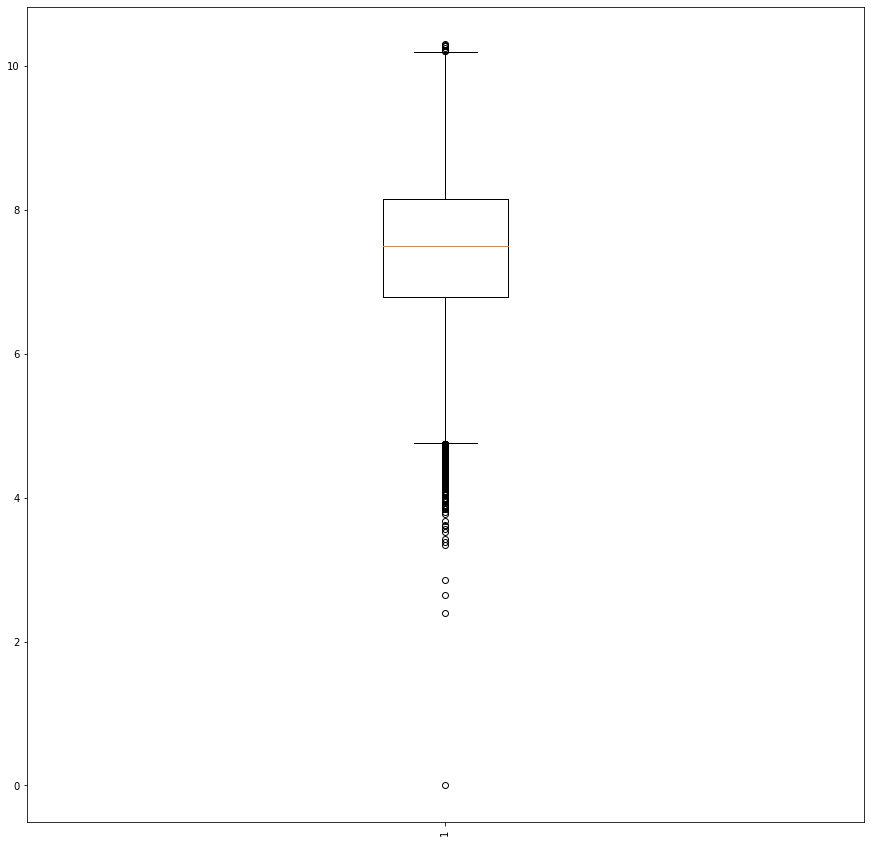

In [107]:
plt.boxplot(target, showcaps=True, showfliers=True)
plt.xticks(rotation=90);

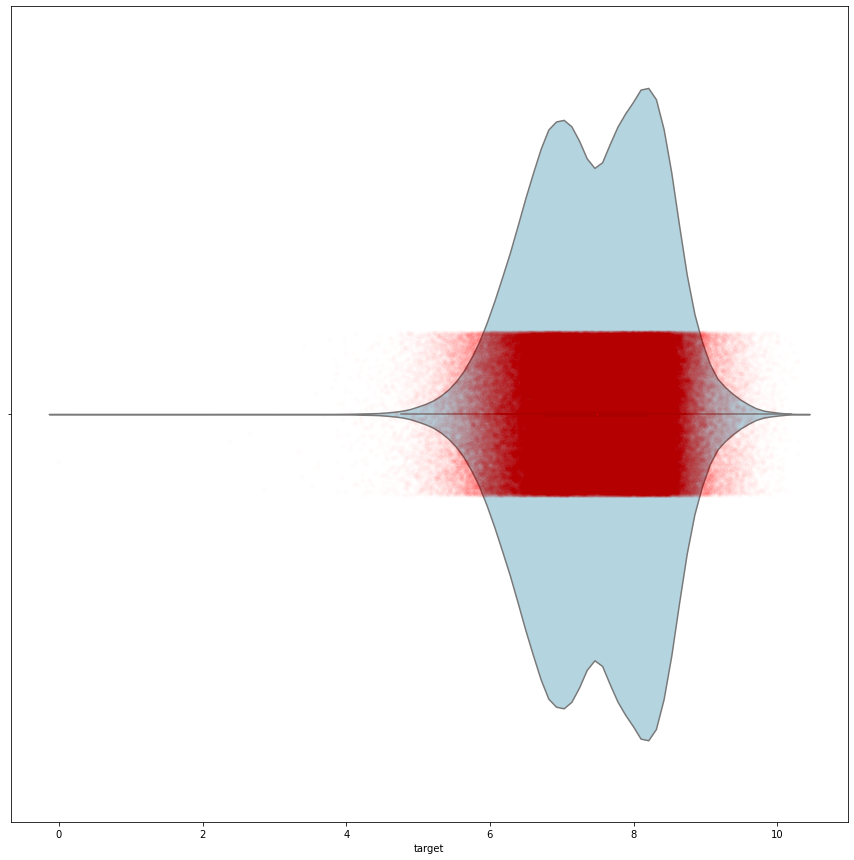

In [108]:
sns.violinplot(target, color='lightblue', showcaps=True, showfliers=True)
sns.stripplot(target, color='red', alpha=0.01);

In [109]:
# Find z-scores and put a threshold of 3 to determine which outliers
# are too much and need to be cut:
z=np.abs(stats.zscore(target))
print(z)

print(np.where(z > 3))

[0.52095284 0.69311424 1.91121129 ... 0.16262658 0.91946473 1.61229138]
(array([   139,   1228,   2856,   3111,   3166,   3338,   3882,   7216,
         7346,   8261,   8737,  10124,  10379,  12765,  13285,  14050,
        14336,  15526,  15727,  15839,  15932,  16051,  17378,  18100,
        18599,  18878,  20502,  20832,  21591,  22842,  25434,  25578,
        26076,  26147,  27258,  27581,  28592,  28924,  30186,  30495,
        30573,  30808,  31009,  31145,  31575,  32566,  33790,  34609,
        34982,  35828,  36276,  37006,  37562,  38874,  39092,  39436,
        39579,  39834,  41524,  41939,  42269,  42398,  42844,  44020,
        44166,  44214,  44233,  46155,  47006,  47354,  47557,  48736,
        49563,  49744,  51184,  51433,  52098,  53789,  54745,  56995,
        57148,  57226,  61283,  61413,  63128,  64187,  64305,  65264,
        65272,  66365,  66674,  67005,  67434,  69096,  70048,  70384,
        70841,  71254,  71376,  72121,  72329,  72560,  72833,  74202,
    

In [110]:
# find where z is greater than three:
x = z.tolist()
x = sorted(x, reverse=True)
print(x[400:450])
print("Index of first value with z-score > 3: ", np.where(z == 3.0000214311993463))
print("Index of first value with z-score < 3: ", np.where(z == 2.9997811336456435))

[3.0143518239749354, 3.014347715543327, 3.013526779129514, 3.0133745455541847, 3.0127903117825103, 3.0127432426350174, 3.011398437039071, 3.010615311950952, 3.0095107014337907, 3.009386121641199, 3.0087851091847564, 3.007956134651399, 3.0076750086028348, 3.0071701601194847, 3.0071655280850145, 3.006054675107619, 3.005681679136278, 3.005164138628554, 3.0042741296566424, 3.003116072228218, 3.0025243959025656, 3.00194319556919, 3.001884091241397, 3.0016169291004817, 3.0011006361529278, 3.0007936801281625, 3.0000214311993463, 2.9997811336456435, 2.999375018203303, 2.999081900048195, 2.999053517223155, 2.998014131167727, 2.9978544608639277, 2.995664096764933, 2.9939565578661282, 2.993880754429777, 2.9929861700595004, 2.9925893567574624, 2.992456565882943, 2.9916097155204895, 2.99045902036638, 2.9895068611853817, 2.9888614299446683, 2.988556114167772, 2.9876140712906514, 2.986242250576981, 2.986001837550251, 2.9850491892882447, 2.983746828061754, 2.982635376634174]
Index of first value with 

In [111]:
print(target.iloc[[3882]])
print(target.iloc[[9720]])

id
6572    4.794362
Name: target, dtype: float64
id
16237    4.794575
Name: target, dtype: float64


In [112]:
# remove the outliers with value greater than 4.794575:
target = target.loc[target >= 4.794575]

In [113]:
# check they are removed:
target.sort_values(ascending=True).head(100)

id
16237     4.794575
277542    4.794935
492572    4.795195
173931    4.796143
172940    4.796285
            ...   
174807    4.854758
453739    4.857957
68641     4.858402
131866    4.859917
37608     4.860552
Name: target, Length: 100, dtype: float64

# Test dataset

In [114]:
test

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
0,A,B,A,C,B,D,A,E,E,G,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
5,A,B,A,C,B,D,A,E,C,L,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
15,A,B,A,C,B,D,A,E,C,F,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
16,A,A,B,A,B,D,A,E,E,F,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
17,A,B,A,A,B,B,A,E,E,I,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499987,A,A,A,C,B,D,A,E,G,L,...,0.277365,0.963678,0.240482,0.686462,0.915165,0.848878,0.459598,0.590327,0.864873,0.425258
499990,A,A,A,C,B,D,A,E,E,F,...,0.523174,0.232072,0.363421,0.694092,0.137002,0.319465,0.364527,0.388908,0.664357,0.224215
499991,A,A,A,C,B,D,A,E,C,K,...,0.517103,0.432927,0.811876,0.328398,0.496017,0.538779,0.466338,0.643869,0.749590,0.457702


In [116]:
# Check for duplicates:

duplicates = test.duplicated()
duplicates.sum()

0

In [115]:
numerical_test = test[["cont0", "cont1", "cont2", "cont3", "cont4", "cont5", "cont6", "cont7", "cont8", "cont9", "cont10", "cont11", "cont12"]]
numerical_test

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12
id,,,,,,,,,,,,,
0,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654
5,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492
15,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572
16,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080
17,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499987,0.919265,0.111147,0.199583,0.181354,0.277365,0.963678,0.240482,0.686462,0.915165,0.848878,0.459598,0.590327,0.864873
499990,0.362875,-0.020197,0.469025,0.336185,0.523174,0.232072,0.363421,0.694092,0.137002,0.319465,0.364527,0.388908,0.664357
499991,0.463060,0.740421,0.446293,0.411387,0.517103,0.432927,0.811876,0.328398,0.496017,0.538779,0.466338,0.643869,0.749590


In [120]:
categorical_test = test[["cat0", "cat1", "cat2", "cat3", "cat4", "cat5", "cat6", "cat7", "cat8", "cat9"]]
categorical_test

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
id,,,,,,,,,,
0,A,B,A,C,B,D,A,E,E,G
5,A,B,A,C,B,D,A,E,C,L
15,A,B,A,C,B,D,A,E,C,F
16,A,A,B,A,B,D,A,E,E,F
17,A,B,A,A,B,B,A,E,E,I
...,...,...,...,...,...,...,...,...,...,...
499987,A,A,A,C,B,D,A,E,G,L
499990,A,A,A,C,B,D,A,E,E,F
499991,A,A,A,C,B,D,A,E,C,K


In [121]:
categorical_test.describe(include='all')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,200000,200000,200000,200000,200000,200000,200000,200000,200000,200000
unique,2,2,2,4,4,4,7,8,7,15
top,A,A,A,C,B,B,A,E,C,F
freq,187700,108047,184259,123185,198283,99662,195157,178335,80741,71623


We see the test set has the same features and range of values as the train set. So we do not make any changes to the train set in relation to the test set,

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=14627e03-5cc7-4767-87c2-ea44d911271b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>